<a href="https://colab.research.google.com/github/KlayClarke/tf--experimentation/blob/main/learning/tf/linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# install and import tensorflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


In [28]:
# load data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [29]:
# check type of data (bunch acts a dict where you can treat keys like attributes)
type(data)

sklearn.utils.Bunch

In [30]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
# check shape of x
data.data.shape

(569, 30)

In [32]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [33]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [34]:
data.target.shape

(569,)

In [35]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# split data into train and test sets
# this lets us simulate future data

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=.33)
N, D = X_train.shape

In [38]:
# scale the data (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# import not to expose any test data to training pipeline
X_test = scaler.transform(X_test) 

In [39]:
# build the tensorflow model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation="sigmoid")
])

# or

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation="sigmoid"))

In [40]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [41]:
# train the model

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 0.7820 - accuracy: 0.5932 - val_loss: 0.7513 - val_accuracy: 0.6223
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7240 - accuracy: 0.6325 - val_loss: 0.7010 - val_accuracy: 0.6596
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6717 - accuracy: 0.6614 - val_loss: 0.6572 - val_accuracy: 0.6968
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6282 - accuracy: 0.6955 - val_loss: 0.6175 - val_accuracy: 0.7128
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5879 - accuracy: 0.7297 - val_loss: 0.5830 - val_accuracy: 0.7340
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5532 - accuracy: 0.7428 - val_loss: 0.5520 - val_accuracy: 0.7500
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5215 - accuracy: 0.7612 - val_loss: 0.5244 - val_accuracy: 0.7713
Epoch 8/100


In [42]:
# evaluate model for loss and accuracy

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.9738
Train score: [0.10174284875392914, 0.9737532734870911]
6/6 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9628
Test score: [0.11303965747356415, 0.9627659320831299]


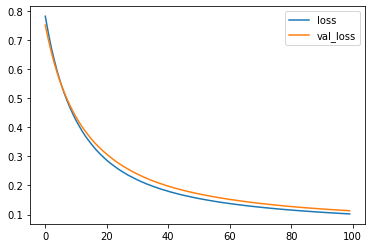

In [43]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

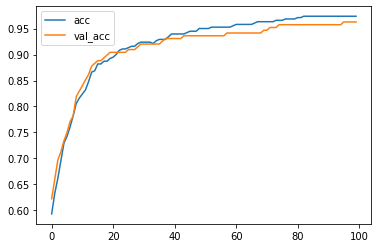

In [44]:
# plot accuracy per iteration
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

## Making Predictions

In [45]:
P = model.predict(X_test)
P # outputs of the sigmoid, interpreted as "probability that y is equal to 1 given x"

array([[9.89220142e-01],
       [6.28155649e-01],
       [9.97373521e-01],
       [9.48474884e-01],
       [9.85126615e-01],
       [9.71892118e-01],
       [6.33195043e-02],
       [9.44393039e-01],
       [7.53931999e-01],
       [7.07961559e-01],
       [5.23524940e-01],
       [2.91470587e-01],
       [9.32110786e-01],
       [8.93301725e-01],
       [6.51666880e-01],
       [4.23136353e-03],
       [9.26458240e-01],
       [1.16543770e-02],
       [4.70951408e-01],
       [1.82655752e-02],
       [9.98005569e-01],
       [9.38261986e-01],
       [4.33753699e-01],
       [9.62532461e-01],
       [5.78290701e-01],
       [4.33772802e-03],
       [9.77030993e-01],
       [9.92457509e-01],
       [2.99566418e-01],
       [9.94616568e-01],
       [9.98006165e-01],
       [9.96405363e-01],
       [9.40756619e-01],
       [9.85930562e-01],
       [3.89414787e-01],
       [9.93175864e-01],
       [8.86954069e-01],
       [9.85122919e-01],
       [2.56267190e-03],
       [9.96911287e-01],


In [46]:
# round to get the actual predictions 
# must flatten since targets and predictions are not same shape
import numpy as np
P = np.round(P).flatten()
P

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1.], dtype=float32)

In [47]:
# calculate accuracy
print("Manually calculated accuracy:", np.mean(P==y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9627659574468085
6/6 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9628
Evaluate output: [0.11303965747356415, 0.9627659320831299]


## Saving and loading a model

In [49]:
model.save("linearclassifier.h5")

In [50]:
# check for file in local storage
!ls -1h

linearclassifier.h5
sample_data


In [51]:
model = tf.keras.models.load_model("linearclassifier.h5")

In [52]:
model

In [53]:
model.layers

In [54]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9628


[0.11303965747356415, 0.9627659320831299]